In [1]:
import numpy as np 
import pandas as pd
from math import log2
from scipy.spatial import distance
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv("/content/drive/My Drive/3rd year/Second Sem/DSC3263/weather_solid/new_weather_solid/new_train.csv", low_memory=False)
test = pd.read_csv("/content/drive/My Drive/3rd year/Second Sem/DSC3263/weather_solid/new_weather_solid/new_test.csv", low_memory=False)
valid = pd.read_csv("/content/drive/My Drive/3rd year/Second Sem/DSC3263/weather_solid/new_weather_solid/new_valid.csv", low_memory=False)

#train = pd.read_csv("/content/drive/My Drive/3rd year/DSC3263/update/train_update.csv", low_memory=False)
#test = pd.read_csv("/content/drive/My Drive/3rd year/DSC3263/update/test_update.csv", low_memory=False)
#valid = pd.read_csv("/content/drive/My Drive/3rd year/DSC3263/update/valid_update.csv", low_memory=False)

In [4]:
train = train.drop(train.columns[[0,1,2]], axis=1)
train.info()

test = test.drop(test.columns[[0,1,2]], axis=1)
test.info()

valid = valid.drop(valid.columns[[0,1,2]], axis=1)
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496800 entries, 0 to 496799
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PRECTOT      496800 non-null  float64
 1   PS           496800 non-null  float64
 2   QV2M         496800 non-null  float64
 3   T2M          496800 non-null  float64
 4   T2MDEW       496800 non-null  float64
 5   T2MWET       496800 non-null  float64
 6   T2M_MAX      496800 non-null  float64
 7   T2M_MIN      496800 non-null  float64
 8   T2M_RANGE    496800 non-null  float64
 9   TS           496800 non-null  float64
 10  WS10M        496800 non-null  float64
 11  WS10M_MAX    496800 non-null  float64
 12  WS10M_MIN    496800 non-null  float64
 13  WS10M_RANGE  496800 non-null  float64
 14  WS50M        496800 non-null  float64
 15  WS50M_MAX    496800 non-null  float64
 16  WS50M_MIN    496800 non-null  float64
 17  WS50M_RANGE  496800 non-null  float64
 18  score        70960 non-n

In [5]:
train = train.dropna()
test = test.dropna()

In [6]:
valid = valid.dropna()

In [7]:
train = train[(train['PRECTOT'] <= train['PRECTOT'].mean() + 3*train['PRECTOT'].std()) &
        (train['PRECTOT'] >= train['PRECTOT'].mean() - 3*train['PRECTOT'].std())]

train = train[(train['PS'] <= train['PS'].mean() + 3*train['PS'].std()) &
        (train['PS'] >= train['PS'].mean() - 3*train['PS'].std())]

train = train[(train['QV2M'] <= train['QV2M'].mean() + 3*train['QV2M'].std()) &
        (train['QV2M'] >= train['QV2M'].mean() - 3*train['QV2M'].std())]

train = train[(train['T2M'] <= train['T2M'].mean() + 3*train['T2M'].std()) &
        (train['T2M'] >= train['T2M'].mean() - 3*train['T2M'].std())]

train = train[(train['T2MDEW'] <= train['T2MDEW'].mean() + 3*train['T2MDEW'].std()) &
        (train['T2MDEW'] >= train['T2MDEW'].mean() - 3*train['T2MDEW'].std())]

train = train[(train['T2MWET'] <= train['T2MWET'].mean() + 3*train['T2MWET'].std()) &
        (train['T2MWET'] >= train['T2MWET'].mean() - 3*train['T2MWET'].std())]

train = train[(train['T2M_MAX'] <= train['T2M_MAX'].mean() + 3*train['T2M_MAX'].std()) &
        (train['T2M_MAX'] >= train['T2M_MAX'].mean() - 3*train['T2M_MAX'].std())]

train = train[(train['T2M_MIN'] <= train['T2M_MIN'].mean() + 3*train['T2M_MIN'].std()) &
        (train['T2M_MIN'] >= train['T2M_MIN'].mean() - 3*train['T2M_MIN'].std())]

train = train[(train['T2M_RANGE'] <= train['T2M_RANGE'].mean() + 3*train['T2M_RANGE'].std()) &
        (train['T2M_RANGE'] >= train['T2M_RANGE'].mean() - 3*train['T2M_RANGE'].std())]

train = train[(train['TS'] <= train['TS'].mean() + 3*train['TS'].std()) &
        (train['TS'] >= train['TS'].mean() - 3*train['TS'].std())]

train = train[(train['WS10M'] <= train['WS10M'].mean() + 3*train['WS10M'].std()) &
        (train['WS10M'] >= train['WS10M'].mean() - 3*train['WS10M'].std())]

train = train[(train['WS10M_MAX'] <= train['WS10M_MAX'].mean() + 3*train['WS10M_MAX'].std()) &
        (train['WS10M_MAX'] >= train['WS10M_MAX'].mean() - 3*train['WS10M_MAX'].std())]

train = train[(train['WS10M_MIN'] <= train['WS10M_MIN'].mean() + 3*train['WS10M_MIN'].std()) &
        (train['WS10M_MIN'] >= train['WS10M_MIN'].mean() - 3*train['WS10M_MIN'].std())]

train = train[(train['WS10M_RANGE'] <= train['WS10M_RANGE'].mean() + 3*train['WS10M_RANGE'].std()) &
        (train['WS10M_RANGE'] >= train['WS10M_RANGE'].mean() - 3*train['WS10M_RANGE'].std())]

train = train[(train['WS50M'] <= train['WS50M'].mean() + 3*train['WS50M'].std()) &
        (train['WS50M'] >= train['WS50M'].mean() - 3*train['WS50M'].std())]

train = train[(train['WS50M_MAX'] <= train['WS50M_MAX'].mean() + 3*train['WS50M_MAX'].std()) &
        (train['WS50M_MAX'] >= train['WS50M_MAX'].mean() - 3*train['WS50M_MAX'].std())]

train = train[(train['WS50M_MIN'] <= train['WS50M_MIN'].mean() + 3*train['WS50M_MIN'].std()) &
        (train['WS50M_MIN'] >= train['WS50M_MIN'].mean() - 3*train['WS50M_MIN'].std())]

train = train[(train['WS50M_RANGE'] <= train['WS50M_RANGE'].mean() + 3*train['WS50M_RANGE'].std()) &
        (train['WS50M_RANGE'] >= train['WS50M_RANGE'].mean() - 3*train['WS50M_RANGE'].std())]

print('Total rows = ',len(train.index))

Total rows =  62285


In [8]:
test = test[(test['PRECTOT'] <= test['PRECTOT'].mean() + 3*test['PRECTOT'].std()) &
        (test['PRECTOT'] >= test['PRECTOT'].mean() - 3*test['PRECTOT'].std())]

test = test[(test['PS'] <= test['PS'].mean() + 3*test['PS'].std()) &
        (test['PS'] >= test['PS'].mean() - 3*test['PS'].std())]

test = test[(test['QV2M'] <= test['QV2M'].mean() + 3*test['QV2M'].std()) &
        (test['QV2M'] >= test['QV2M'].mean() - 3*test['QV2M'].std())]

test = test[(test['T2M'] <= test['T2M'].mean() + 3*test['T2M'].std()) &
        (test['T2M'] >= test['T2M'].mean() - 3*test['T2M'].std())]

test = test[(test['T2MDEW'] <= test['T2MDEW'].mean() + 3*test['T2MDEW'].std()) &
        (test['T2MDEW'] >= test['T2MDEW'].mean() - 3*test['T2MDEW'].std())]

test = test[(test['T2MWET'] <= test['T2MWET'].mean() + 3*test['T2MWET'].std()) &
        (test['T2MWET'] >= test['T2MWET'].mean() - 3*test['T2MWET'].std())]

test = test[(test['T2M_MAX'] <= test['T2M_MAX'].mean() + 3*test['T2M_MAX'].std()) &
        (test['T2M_MAX'] >= test['T2M_MAX'].mean() - 3*test['T2M_MAX'].std())]

test = test[(test['T2M_MIN'] <= test['T2M_MIN'].mean() + 3*test['T2M_MIN'].std()) &
        (test['T2M_MIN'] >= test['T2M_MIN'].mean() - 3*test['T2M_MIN'].std())]

test = test[(test['T2M_RANGE'] <= test['T2M_RANGE'].mean() + 3*test['T2M_RANGE'].std()) &
        (test['T2M_RANGE'] >= test['T2M_RANGE'].mean() - 3*test['T2M_RANGE'].std())]

test = test[(test['TS'] <= test['TS'].mean() + 3*test['TS'].std()) &
        (test['TS'] >= test['TS'].mean() - 3*test['TS'].std())]

test = test[(test['WS10M'] <= test['WS10M'].mean() + 3*test['WS10M'].std()) &
        (test['WS10M'] >= test['WS10M'].mean() - 3*test['WS10M'].std())]

test = test[(test['WS10M_MAX'] <= test['WS10M_MAX'].mean() + 3*test['WS10M_MAX'].std()) &
        (test['WS10M_MAX'] >= test['WS10M_MAX'].mean() - 3*test['WS10M_MAX'].std())]

test = test[(test['WS10M_MIN'] <= test['WS10M_MIN'].mean() + 3*test['WS10M_MIN'].std()) &
        (test['WS10M_MIN'] >= test['WS10M_MIN'].mean() - 3*test['WS10M_MIN'].std())]

test = test[(test['WS10M_RANGE'] <= test['WS10M_RANGE'].mean() + 3*test['WS10M_RANGE'].std()) &
        (test['WS10M_RANGE'] >= test['WS10M_RANGE'].mean() - 3*test['WS10M_RANGE'].std())]

test = test[(test['WS50M'] <= test['WS50M'].mean() + 3*test['WS50M'].std()) &
        (test['WS50M'] >= test['WS50M'].mean() - 3*test['WS50M'].std())]

test = test[(test['WS50M_MAX'] <= test['WS50M_MAX'].mean() + 3*test['WS50M_MAX'].std()) &
        (test['WS50M_MAX'] >= test['WS50M_MAX'].mean() - 3*test['WS50M_MAX'].std())]

test = test[(test['WS50M_MIN'] <= test['WS50M_MIN'].mean() + 3*test['WS50M_MIN'].std()) &
        (test['WS50M_MIN'] >= test['WS50M_MIN'].mean() - 3*test['WS50M_MIN'].std())]

test = test[(test['WS50M_RANGE'] <= test['WS50M_RANGE'].mean() + 3*test['WS50M_RANGE'].std()) &
        (test['WS50M_RANGE'] >= test['WS50M_RANGE'].mean() - 3*test['WS50M_RANGE'].std())]

print('Total rows = ',len(test.index))

Total rows =  7364


In [9]:
valid = valid[(valid['PRECTOT'] <= valid['PRECTOT'].mean() + 3*valid['PRECTOT'].std()) &
        (valid['PRECTOT'] >= valid['PRECTOT'].mean() - 3*valid['PRECTOT'].std())]

valid = valid[(valid['PS'] <= valid['PS'].mean() + 3*valid['PS'].std()) &
        (valid['PS'] >= valid['PS'].mean() - 3*valid['PS'].std())]

valid = valid[(valid['QV2M'] <= valid['QV2M'].mean() + 3*valid['QV2M'].std()) &
        (valid['QV2M'] >= valid['QV2M'].mean() - 3*valid['QV2M'].std())]

valid = valid[(valid['T2M'] <= valid['T2M'].mean() + 3*valid['T2M'].std()) &
        (valid['T2M'] >= valid['T2M'].mean() - 3*valid['T2M'].std())]

valid = valid[(valid['T2MDEW'] <= valid['T2MDEW'].mean() + 3*valid['T2MDEW'].std()) &
        (valid['T2MDEW'] >= valid['T2MDEW'].mean() - 3*valid['T2MDEW'].std())]

valid = valid[(valid['T2MWET'] <= valid['T2MWET'].mean() + 3*valid['T2MWET'].std()) &
        (valid['T2MWET'] >= valid['T2MWET'].mean() - 3*valid['T2MWET'].std())]

valid = valid[(valid['T2M_MAX'] <= valid['T2M_MAX'].mean() + 3*valid['T2M_MAX'].std()) &
        (valid['T2M_MAX'] >= valid['T2M_MAX'].mean() - 3*valid['T2M_MAX'].std())]

valid = valid[(valid['T2M_MIN'] <= valid['T2M_MIN'].mean() + 3*valid['T2M_MIN'].std()) &
        (valid['T2M_MIN'] >= valid['T2M_MIN'].mean() - 3*valid['T2M_MIN'].std())]

valid = valid[(valid['T2M_RANGE'] <= valid['T2M_RANGE'].mean() + 3*valid['T2M_RANGE'].std()) &
        (valid['T2M_RANGE'] >= valid['T2M_RANGE'].mean() - 3*valid['T2M_RANGE'].std())]

valid = valid[(valid['TS'] <= valid['TS'].mean() + 3*valid['TS'].std()) &
        (valid['TS'] >= valid['TS'].mean() - 3*valid['TS'].std())]

valid = valid[(valid['WS10M'] <= valid['WS10M'].mean() + 3*valid['WS10M'].std()) &
        (valid['WS10M'] >= valid['WS10M'].mean() - 3*valid['WS10M'].std())]

valid = valid[(valid['WS10M_MAX'] <= valid['WS10M_MAX'].mean() + 3*valid['WS10M_MAX'].std()) &
        (valid['WS10M_MAX'] >= valid['WS10M_MAX'].mean() - 3*valid['WS10M_MAX'].std())]

valid = valid[(valid['WS10M_MIN'] <= valid['WS10M_MIN'].mean() + 3*valid['WS10M_MIN'].std()) &
        (valid['WS10M_MIN'] >= valid['WS10M_MIN'].mean() - 3*valid['WS10M_MIN'].std())]

valid = valid[(valid['WS10M_RANGE'] <= valid['WS10M_RANGE'].mean() + 3*valid['WS10M_RANGE'].std()) &
        (valid['WS10M_RANGE'] >= valid['WS10M_RANGE'].mean() - 3*valid['WS10M_RANGE'].std())]

valid = valid[(valid['WS50M'] <= valid['WS50M'].mean() + 3*valid['WS50M'].std()) &
        (valid['WS50M'] >= valid['WS50M'].mean() - 3*valid['WS50M'].std())]

valid = valid[(valid['WS50M_MAX'] <= valid['WS50M_MAX'].mean() + 3*valid['WS50M_MAX'].std()) &
        (valid['WS50M_MAX'] >= valid['WS50M_MAX'].mean() - 3*valid['WS50M_MAX'].std())]

valid = valid[(valid['WS50M_MIN'] <= valid['WS50M_MIN'].mean() + 3*valid['WS50M_MIN'].std()) &
        (valid['WS50M_MIN'] >= valid['WS50M_MIN'].mean() - 3*valid['WS50M_MIN'].std())]

valid = valid[(valid['WS50M_RANGE'] <= valid['WS50M_RANGE'].mean() + 3*valid['WS50M_RANGE'].std()) &
        (valid['WS50M_RANGE'] >= valid['WS50M_RANGE'].mean() - 3*valid['WS50M_RANGE'].std())]

print('Total rows = ',len(valid.index))

Total rows =  7341


In [10]:
features = ['PS', 'QV2M', 'T2M', 'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS',
       'WS10M', 'WS10M_MAX', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score']

In [11]:
train = train[features]
test = test[features]
valid = valid[features]

In [12]:
train['score'] = train['score'].round().astype(int)
test['score'] = test['score'].round().astype(int)
valid['score'] = valid['score'].round().astype(int)

In [13]:
All = pd.concat([train, test], sort=True).reset_index(drop=True)
All.head()

,PS,QV2M,T2M,T2MDEW,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,100.29,6.42,11.40,6.09,18.09,2.16,15.92,11.31,3.84,5.67,3.59,6.73,9.31,3.74,5.58,1
1,100.40,6.63,11.48,7.84,18.88,5.72,13.16,10.43,1.76,2.48,1.43,3.55,6.38,1.71,4.67,2
2,100.39,9.53,14.28,13.26,18.04,8.98,9.06,14.19,2.63,3.60,1.92,5.19,6.40,3.84,2.55,2
3,100.11,2.05,-0.78,-7.93,5.65,-5.46,11.11,-0.61,3.35,4.59,2.32,5.75,8.03,3.96,4.07,2
4,101.00,3.36,2.06,-1.73,11.02,-4.21,15.23,1.88,2.03,2.74,1.86,4.18,6.38,1.27,5.11,1


In [ ]:
All = All.dropna()

In [14]:
train_cleaned = train
test_cleaned = test

In [15]:
print(train_cleaned.shape)
print(test_cleaned.shape)
print(valid.shape)

(62285, 16)
(7364, 16)
(7341, 16)


In [16]:
def Prob_train(feature):
    l = []
    for j in train_cleaned[train_cleaned.columns[feature]].unique().tolist():
        l.append((train_cleaned[train_cleaned.columns[feature]].value_counts()[j])/train_cleaned.shape[0])
    return l

def Prob_test(feature):
    l = []
    for j in test_cleaned[test_cleaned.columns[feature]].unique().tolist():
        l.append((test_cleaned[test_cleaned.columns[feature]].value_counts()[j])/test_cleaned.shape[0])
    return l

def train_distribution(feature):
    Feature_prob = {}
    for u,r in zip(train_cleaned[train_cleaned.columns[feature]].unique().tolist(),Prob_train(feature)):
        Feature_prob[u] = r
    return Feature_prob
        
def test_distribution(feature):
    Feature_prob = {}
    for u,r in zip(test_cleaned[test_cleaned.columns[feature]].unique().tolist(),Prob_test(feature) ):
        Feature_prob[u] = r
    return Feature_prob

def train_events(feature):
    return train_cleaned[train_cleaned.columns[feature]].unique().tolist()

def test_events(feature):
    return test_cleaned[test_cleaned.columns[feature]].unique().tolist()

In [17]:
def Prob_train_normal(feature):
    l = []
    for j in All[All.columns[1]].unique().tolist():
        if list(set(train_cleaned[train_cleaned.columns[feature]].tolist())).__contains__(j) == False:
            l.append(0.000001)
        else:
            l.append((train_cleaned[train_cleaned.columns[feature]].value_counts()[j])/train_cleaned.shape[0])
    return l

def Prob_test_normal(feature):
    l = []
    for j in All[All.columns[1]].unique().tolist():
        if list(set(test_cleaned[test_cleaned.columns[feature]].tolist())).__contains__(j) == False:
            l.append(0.000001)
        else:
            l.append((test_cleaned[test_cleaned.columns[feature]].value_counts()[j])/test_cleaned.shape[0])
    return l

In [18]:
def distribution_plot(feature):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 2))
    font = {'family':'serif','color':'blue','size':15}
    axes[0].bar(train_events(feature), Prob_train(feature))
    axes[0].set(xlabel=train_cleaned.columns[feature], ylabel='Probability')
    axes[0].set_title("Train",fontdict = font)

    axes[1].bar(test_events(feature), Prob_test(feature))
    axes[1].set(xlabel=test_cleaned.columns[feature], ylabel='Probability')
    axes[1].set_title("Test",fontdict = font)
    return fig.tight_layout() 

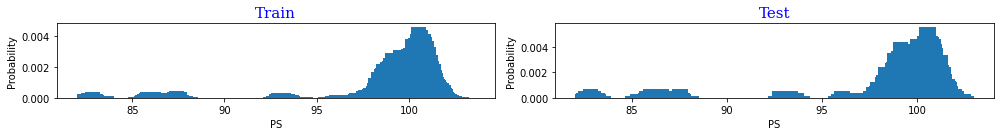

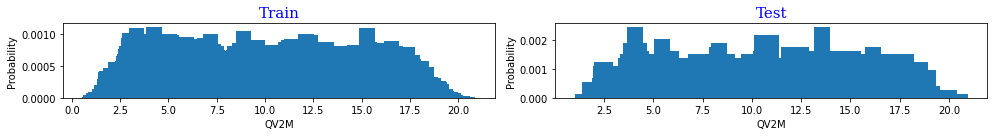

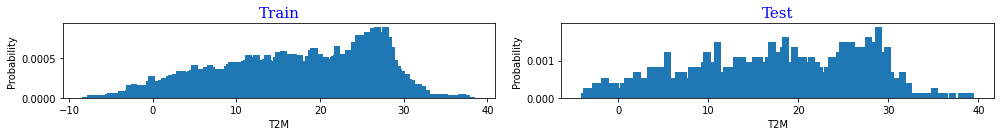

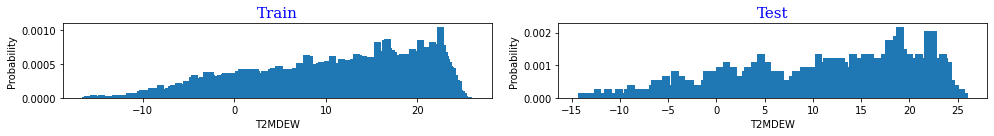

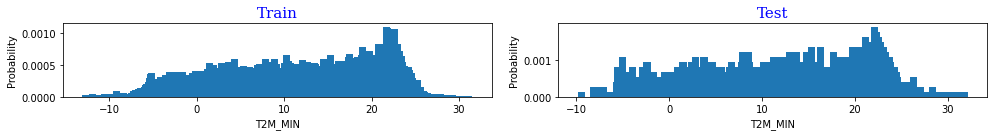

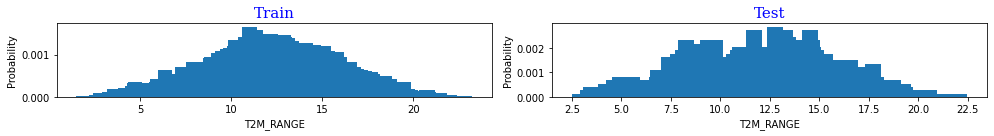

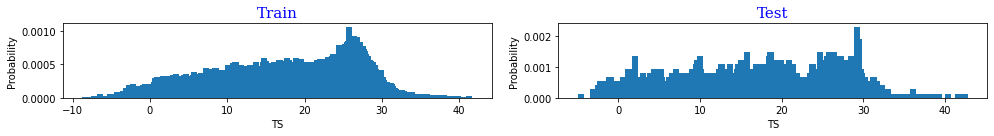

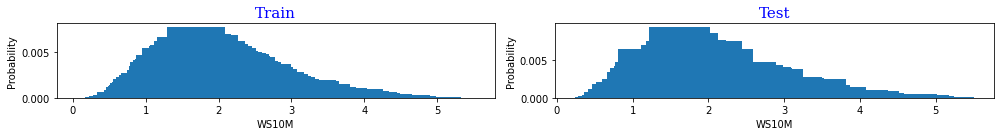

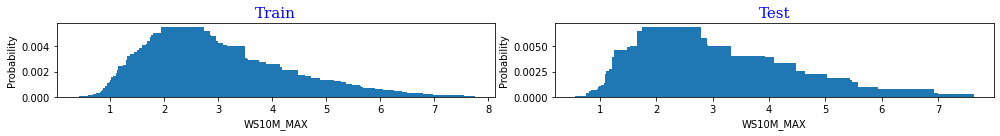

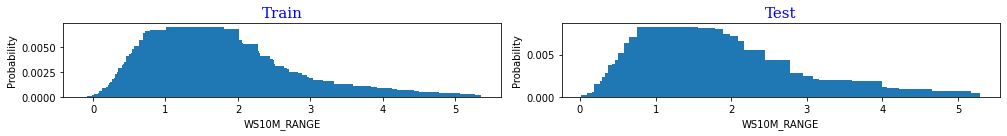

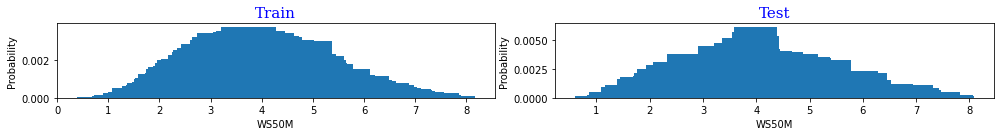

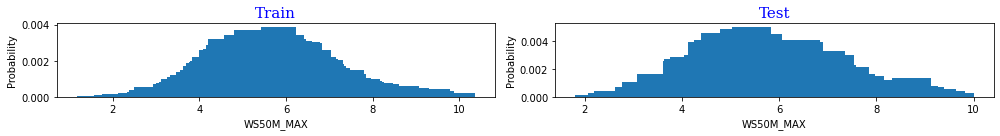

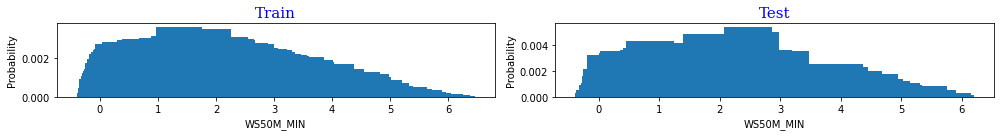

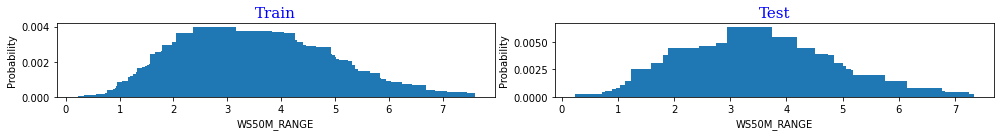

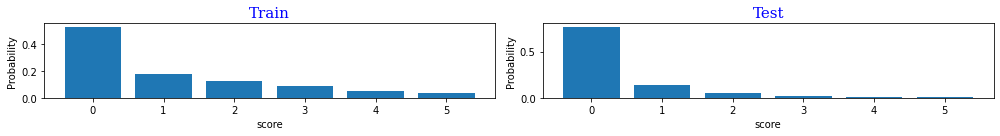

In [19]:
import matplotlib.pyplot as plt
for i in range(All.shape[1]):
    if i !=4:
        distribution_plot(i)

In [20]:
def kl_divergence(p, q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

In [21]:
KL_divergences = []
for i in range(All.shape[1]):
    KL_divergences.append(kl_divergence(Prob_train_normal(i),Prob_test_normal(i)))
    print('KL(Prob_train || Prob_test) for %s is: %.3f bits' % (All.columns[i],kl_divergence(Prob_train_normal(i),Prob_test_normal(i))))

KL(Prob_train || Prob_test) for PS is: 0.000 bits
KL(Prob_train || Prob_test) for QV2M is: 0.741 bits
KL(Prob_train || Prob_test) for T2M is: 0.841 bits
KL(Prob_train || Prob_test) for T2MDEW is: 0.872 bits
KL(Prob_train || Prob_test) for T2M_MAX is: 0.787 bits
KL(Prob_train || Prob_test) for T2M_MIN is: 0.917 bits
KL(Prob_train || Prob_test) for T2M_RANGE is: 0.560 bits
KL(Prob_train || Prob_test) for TS is: 0.850 bits
KL(Prob_train || Prob_test) for WS10M is: 0.076 bits
KL(Prob_train || Prob_test) for WS10M_MAX is: 0.200 bits
KL(Prob_train || Prob_test) for WS10M_RANGE is: 0.063 bits
KL(Prob_train || Prob_test) for WS50M is: 0.200 bits
KL(Prob_train || Prob_test) for WS50M_MAX is: 0.268 bits
KL(Prob_train || Prob_test) for WS50M_MIN is: 0.109 bits
KL(Prob_train || Prob_test) for WS50M_RANGE is: 0.187 bits
KL(Prob_train || Prob_test) for score is: 0.616 bits


In [22]:
from scipy.stats import ks_2samp

In [23]:
KS_test = []
for i in range(All.shape[1]):
    KS_test.append(ks_2samp(Prob_train_normal(i),Prob_test_normal(i)))
    print(All.columns[i], "-> ",ks_2samp(Prob_train_normal(i),Prob_test_normal(i)))

PS ->  KstestResult(statistic=0.0, pvalue=1.0, statistic_location=1e-06, statistic_sign=1)
QV2M ->  KstestResult(statistic=0.26096143687268886, pvalue=4.7408964799555716e-57, statistic_location=0.0004073872895165671, statistic_sign=-1)


KeyboardInterrupt: ignored

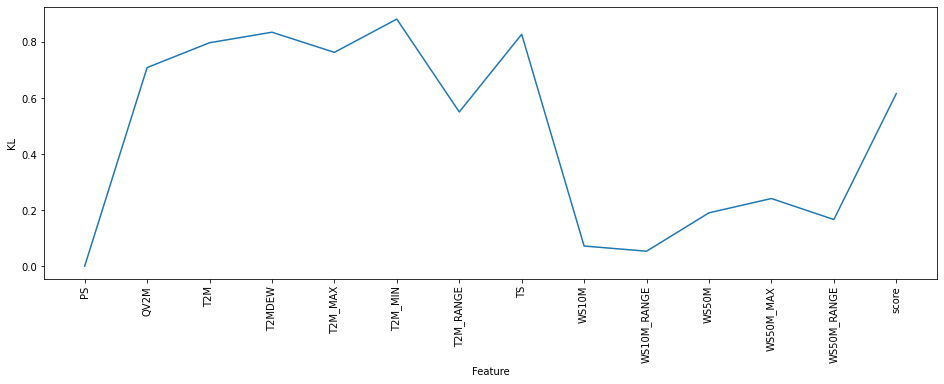

In [ ]:
plt.figure(figsize=(16, 5))
plt.plot(All.columns.tolist(), KL_divergences)
plt.xlabel("Feature")
plt.ylabel("KL")
plt.xticks(All.columns.tolist(),rotation=90)
plt.show()

In [ ]:
js_divergences = []
for i in range(All.shape[1]):
    js_divergences.append(distance.jensenshannon(Prob_train_normal(i),Prob_test_normal(i)))
    print('JSD(Prob_train || Prob_test) for %s is: %.5f bits' % (All.columns[i],distance.jensenshannon(Prob_train_normal(i),
                                                                        Prob_test_normal(i))))

JSD(Prob_train || Prob_test) for PS is: 0.00000 bits
JSD(Prob_train || Prob_test) for QV2M is: 0.26107 bits
JSD(Prob_train || Prob_test) for T2M is: 0.35014 bits
JSD(Prob_train || Prob_test) for T2MDEW is: 0.31811 bits
JSD(Prob_train || Prob_test) for T2M_MAX is: 0.42772 bits
JSD(Prob_train || Prob_test) for T2M_MIN is: 0.32380 bits
JSD(Prob_train || Prob_test) for T2M_RANGE is: 0.23447 bits
JSD(Prob_train || Prob_test) for TS is: 0.35344 bits
JSD(Prob_train || Prob_test) for WS10M is: 0.10781 bits
JSD(Prob_train || Prob_test) for WS10M_RANGE is: 0.10998 bits
JSD(Prob_train || Prob_test) for WS50M is: 0.14902 bits
JSD(Prob_train || Prob_test) for WS50M_MAX is: 0.15509 bits
JSD(Prob_train || Prob_test) for WS50M_RANGE is: 0.13549 bits
JSD(Prob_train || Prob_test) for score is: 0.20661 bits


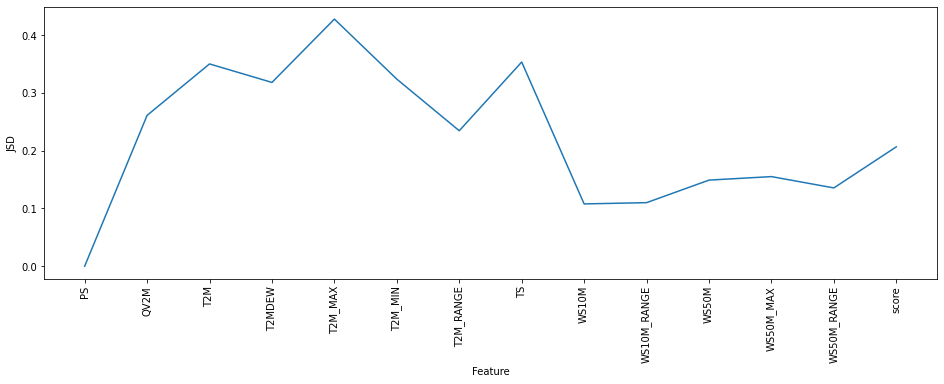

In [ ]:
plt.figure(figsize=(16, 5))
plt.plot(All.columns.tolist(), js_divergences)
plt.xlabel("Feature")
plt.ylabel("JSD")
plt.xticks(rotation=90)
plt.show()